The London Bikeshare dataset, spanning from January 04, 2015, to January 03, 2017, provides comprehensive data to analyze and predict bike-sharing trends in London. The dataset integrates information from Transport for London (TfL), including bike-sharing statistics, weather data from freemeteo.com, and holiday information from the UK government. Governed by TfL's Open Data License, the dataset is freely available for use, with the stipulation that TfL and other data sources are credited appropriately. This dataset serves as a valuable resource for exploring factors influencing bike-sharing usage in London.

**Data Source:** https://tfl.gov.uk/info-for/open-data-users/our-open-data#on-this-page-5

**Kaggle Dataset:** https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

# Dataset Features

* "timestamp" - timestamp field for grouping the data
* 	"cnt" - the count of a new bike shares
* 	"t1" - real temperature in C
* 	"t2" - temperature in C "feels like"
* 	"hum" - humidity in percentage
* 	"wind_speed" - wind speed in km/h
* 	"weather_code" - category of the weather
* 	"is_holiday" - boolean field - 1 holiday / 0 non holiday
* 	"is_weekend" - boolean field - 1 if the day is weekend

* 	"season" - category field meteorological seasons: 
     0-spring;1-summer; 2-fall; 3-winter.

* 	"weather_code" category description:
     1 = Clear ;mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity, 2 = scattered clouds / few clouds 
     3 = Broken clouds, 4 = Cloudy, 7 = Rain/ light Rain shower/ Light rain, 10 = rain with thunderstorm, 26 = snowfall, 94 = Freezing Fog

# Data Exploration

In [4]:
#Importing the Libraries

import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
#Loading the dataset
df = pd.read_csv('Data/london-bike-sharing.csv')

In [6]:
#getting the overview of the dataset
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [7]:
#checking the null values count and the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
#Checking if duplicate rows exist in the data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [9]:
#Renaming the columns to make it easily understandable

df = df.rename(columns={'cnt': 'Count', 't1': 'Temperature(Real)', 't2': 'Temperature(FeelsLike)', 'hum': 'Humidity', 'wind_speed': 'WindSpeed', 'weather_code': 'WeatherCode', 'is_holiday': 'Holiday', 'is_weekend': 'Weekend', 'season': 'Seasons'})
df.head()

,timestamp,Count,Temperature(Real),Temperature(FeelsLike),Humidity,WindSpeed,WeatherCode,Holiday,Weekend,Seasons
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
#Spliting the timestamp column into seperate columns

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['Time'] = df['timestamp'].dt.time
df['Date'] = df['timestamp'].dt.date
df['Day'] = df['timestamp'].dt.day
df['Month'] = df['timestamp'].dt.month
df['Year'] = df['timestamp'].dt.year

df[['Time', 'Date', 'Day', 'Month', 'Year']]

,Time,Date,Day,Month,Year
0,00:00:00,2015-01-04,4,1,2015
1,01:00:00,2015-01-04,4,1,2015
2,02:00:00,2015-01-04,4,1,2015
3,03:00:00,2015-01-04,4,1,2015
4,04:00:00,2015-01-04,4,1,2015
...,...,...,...,...,...
17409,19:00:00,2017-01-03,3,1,2017
17410,20:00:00,2017-01-03,3,1,2017
17411,21:00:00,2017-01-03,3,1,2017
17412,22:00:00,2017-01-03,3,1,2017


In [11]:
#Reordering the splitted columns at the start
Reorder = ['timestamp', 'Time', 'Date', 'Day', 'Month', 'Year', 'Count', 'Temperature(Real)', 'Temperature(FeelsLike)', 'Humidity', 'WindSpeed', 'WeatherCode', 'Holiday', 'Weekend', 'Seasons']
df = df[Reorder]

#Dropping the timestamp column
df.drop(['timestamp'],axis=1,inplace=True)
df.head()

,Time,Date,Day,Month,Year,Count,Temperature(Real),Temperature(FeelsLike),Humidity,WindSpeed,WeatherCode,Holiday,Weekend,Seasons
0,00:00:00,2015-01-04,4,1,2015,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,01:00:00,2015-01-04,4,1,2015,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,02:00:00,2015-01-04,4,1,2015,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,03:00:00,2015-01-04,4,1,2015,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,04:00:00,2015-01-04,4,1,2015,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [12]:
#Since the dataset contains quantitative data, creating dictionaries to use categorical labels later into plots

WeatherCode_Labeling = {1: 'Clear', 2: 'Scatteredcloud', 3: "Broken Clouds", 4: "Cloudy", 7: "Rain", 10: "Rain with Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"}
Seasons_Labeling = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
Holiday_Labeling = {0: 'Non-Holiday', 1: 'Holiday'}
Weekend_Labeling = {0: 'Non-Weekend', 1: 'Weekend'}
Month_Labeling = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df['WeatherCode_Labeled'] = df['WeatherCode'].map(WeatherCode_Labeling)
df['Seasons_Labeled'] = df['Seasons'].map(Seasons_Labeling)
df['Holiday_Labeled'] = df['Holiday'].map(Holiday_Labeling)
df['Weekend_Labeled'] = df['Weekend'].map(Weekend_Labeling)
df['Month_Labeled'] = df['Month'].map(Month_Labeling)

# Data Analysis

/var/folders/46/w6ssnrz90jd99dt2brnl5b2m0000gn/T/ipykernel_81980/1949769798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlation_with_Count.index, y=correlation_with_Count.values, palette='magma')


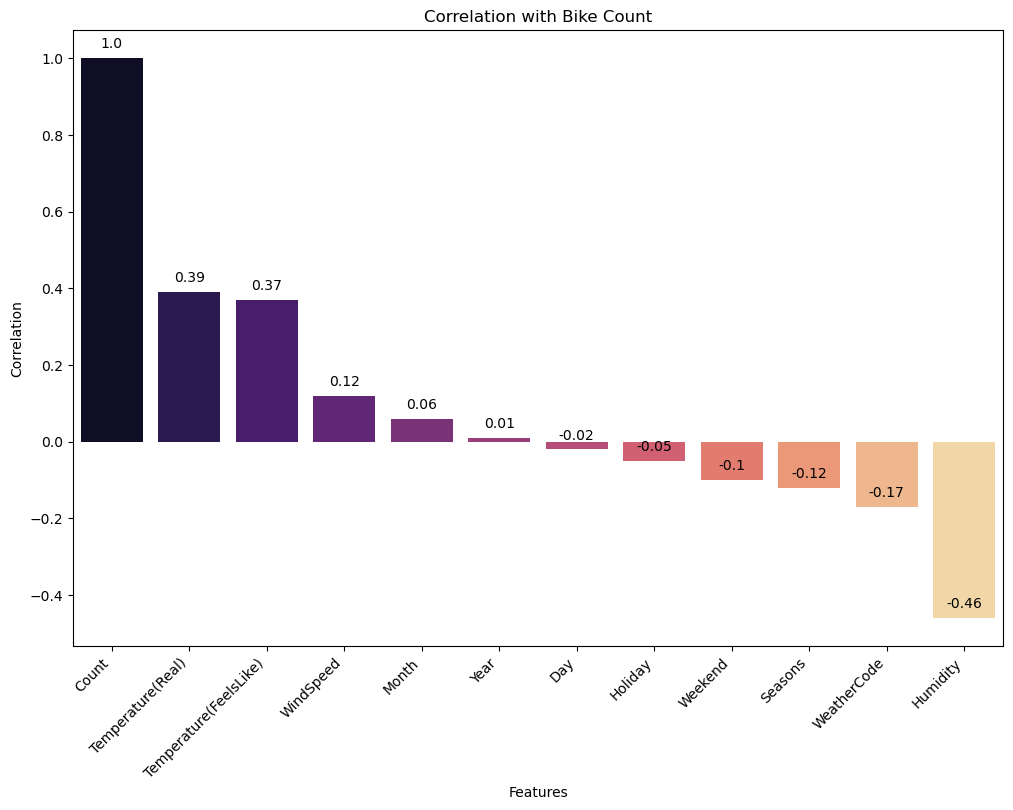

In [33]:
#Plotting the correlation of all variables/features

correlation_matrix = round(df.select_dtypes("number").corr(), 2)

correlation_with_Count = correlation_matrix['Count'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=correlation_with_Count.index, y=correlation_with_Count.values, palette='magma')
plt.title('Correlation with Bike Count')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Visualizing Bike Count/Usage over the time

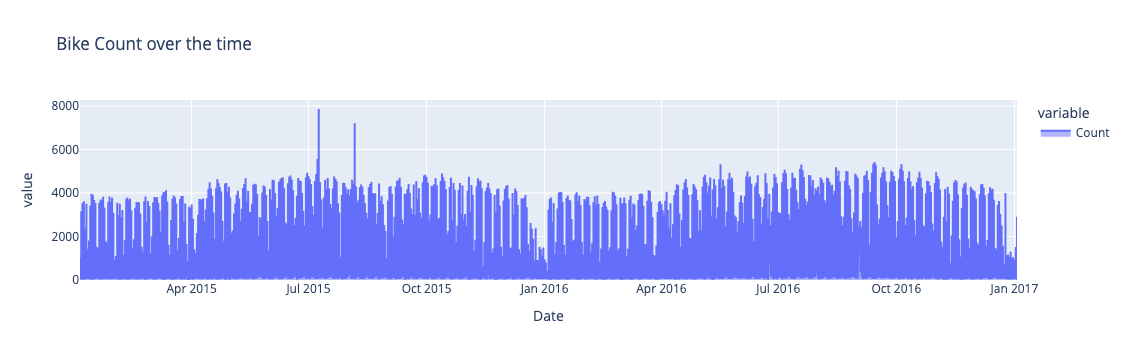

In [69]:
fig = px.area(df, x='Date', y=['Count'], title='Bike Count over the time')

fig.update_layout(
    paper_bgcolor='white'  # Background color of the entire figure
)

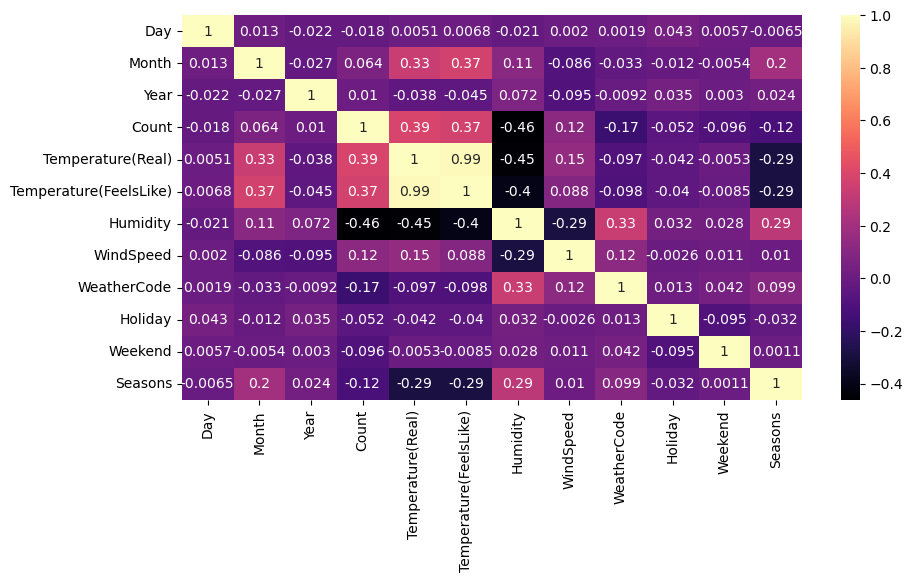

In [47]:
#Heatmap
df_heatmap = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10,5))
sns.heatmap(df_heatmap.corr(), cmap='magma', annot=True)
plt.show()

## Scatterplot of Bike Count and Temperature

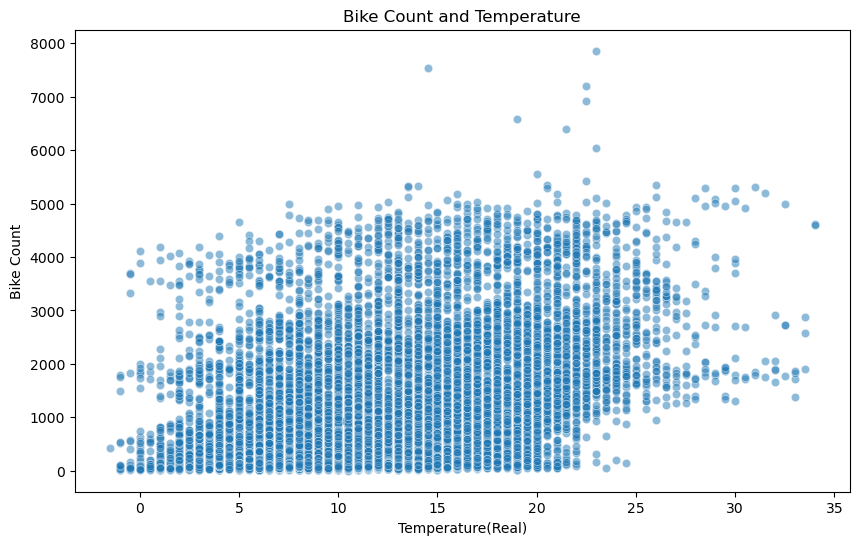

In [78]:
# Scatterplot of Bike Count and Temperature
plt.figure(figsize=(10,6))

sns.scatterplot(x='Temperature(Real)', y='Count', data=df, alpha=0.5)
plt.title('Bike Count and Temperature')
plt.xlabel('Temperature(Real)')
plt.ylabel('Bike Count')

plt.show()

## Impact of Humidity on Bike Count

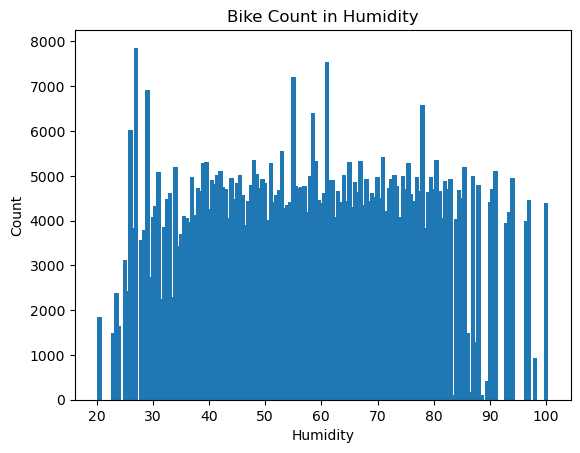

In [92]:
#Impact of Humidity on Bike Count
plt.bar(df['Humidity'], df['Count'])
plt.title('Bike Count in Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

## Impact of WeatherCode on the Bike Count

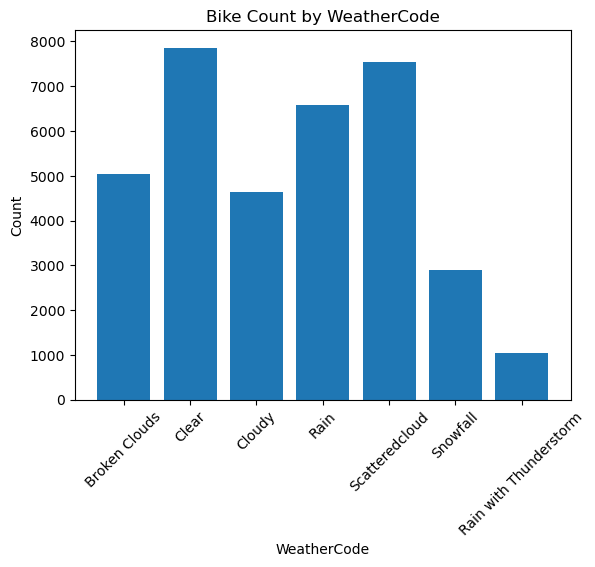

In [90]:
#Impact of WeatherCode on the Bike Count
plt.bar(df['WeatherCode_Labeled'], df['Count'])
plt.title('Bike Count by WeatherCode')
plt.xlabel('WeatherCode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Impact of Seasons on the Bike Count

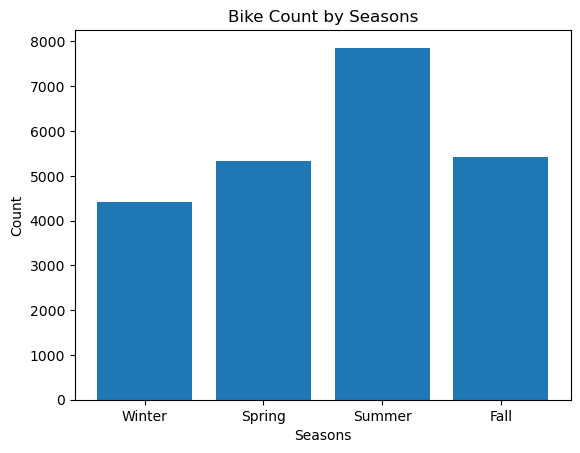

In [97]:
#Impact of Seasons on the Bike Count
plt.bar(df['Seasons_Labeled'], df['Count'])
plt.title('Bike Count by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

## Bike Count with Weather and Seasons Combined

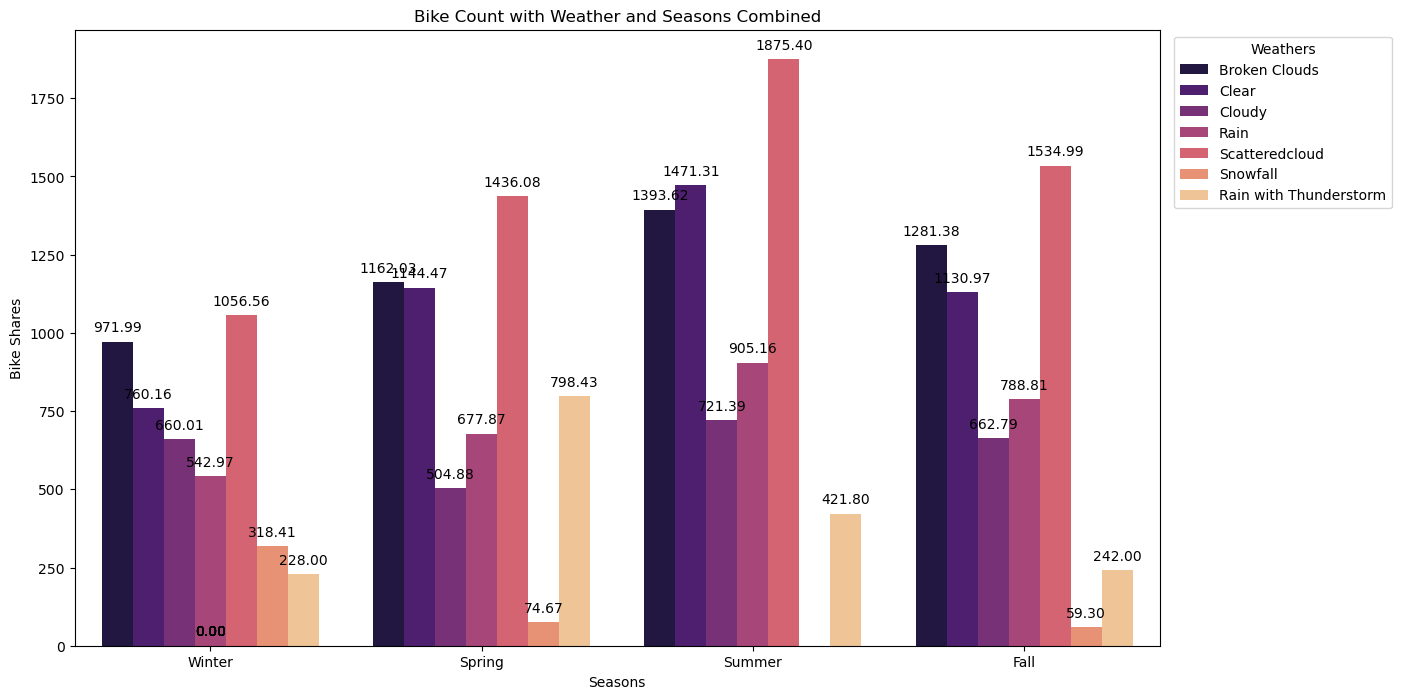

In [101]:
#Bike Count with Weather and Seasons Combined
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=df['Seasons_Labeled'], data=df, palette="magma", y=df['Count'], hue=df['WeatherCode_Labeled'], errorbar=None)
plt.title('Bike Count with Weather and Seasons Combined')
plt.xlabel('Seasons')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(bbox_to_anchor = (0.72, 0.5, 0.5, 0.5), title= 'Weathers')
plt.show()

Earlier we saw that bike had high usage in summer season and in scattered clouds weather. But as we plot both the variables together, we see that the count is high in scattered clouds weather, regardless of the season. This tells us about the consumer choice, that weather is a key indicator.

## Bike Count by Month

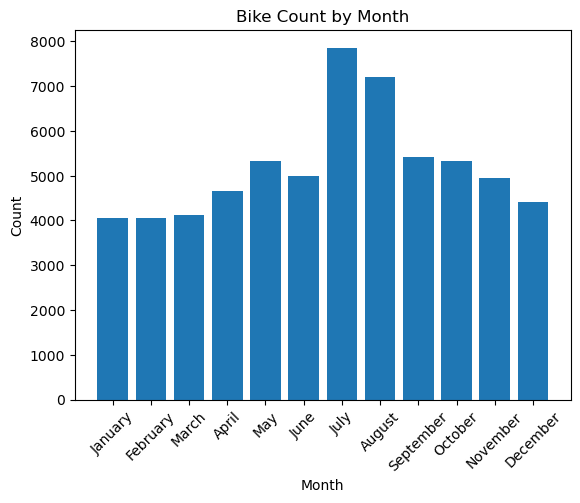

In [112]:
#Bike Count by Month
plt.bar(df['Month_Labeled'], df['Count'])
plt.title('Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Bike Count By Time

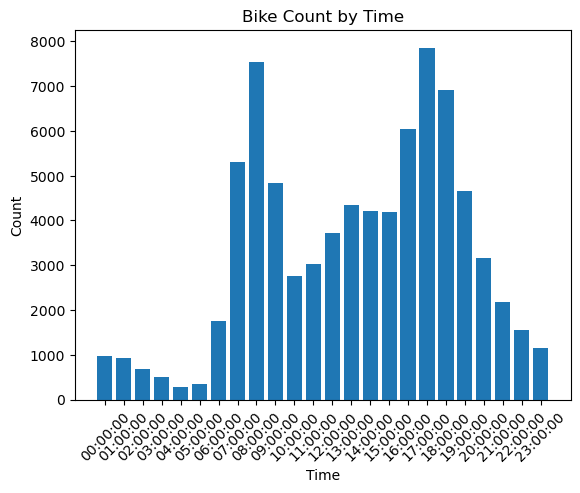

In [116]:
#Bike Count By Time
fig = plt.bar(df['Time'].astype(str), df['Count'])
plt.title('Bike Count by Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Showing the plot
plt.show()

## Impact of Holiday on Bike Count

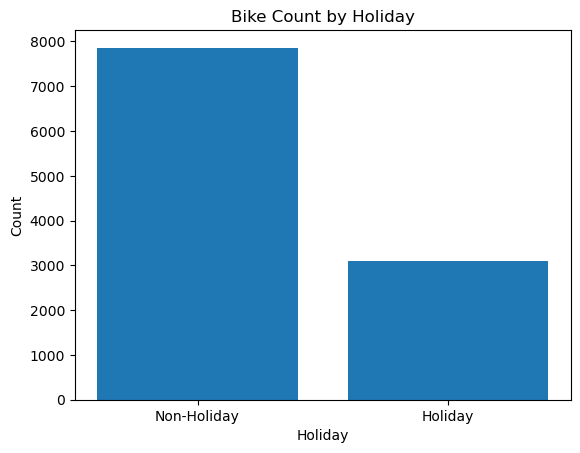

In [123]:
#Impact of Holiday on Bike Count
plt.bar(df['Holiday_Labeled'], df['Count'])
plt.title('Bike Count by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

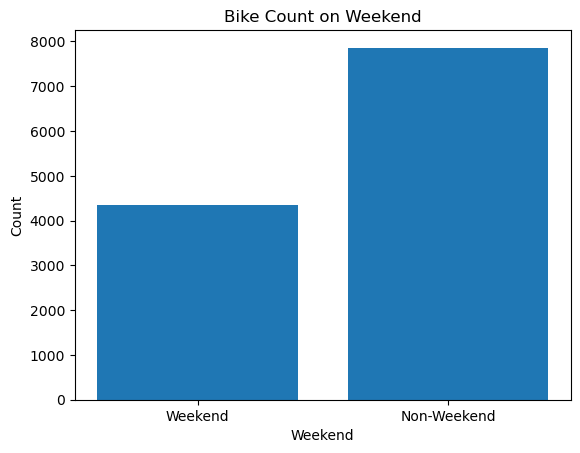

In [126]:
#Impact of Weekend on Bike Count
plt.bar(df['Weekend_Labeled'], df['Count'])
plt.title('Bike Count on Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()

## Plotting Time in vertically stalked subplots to compare its impact with other variables

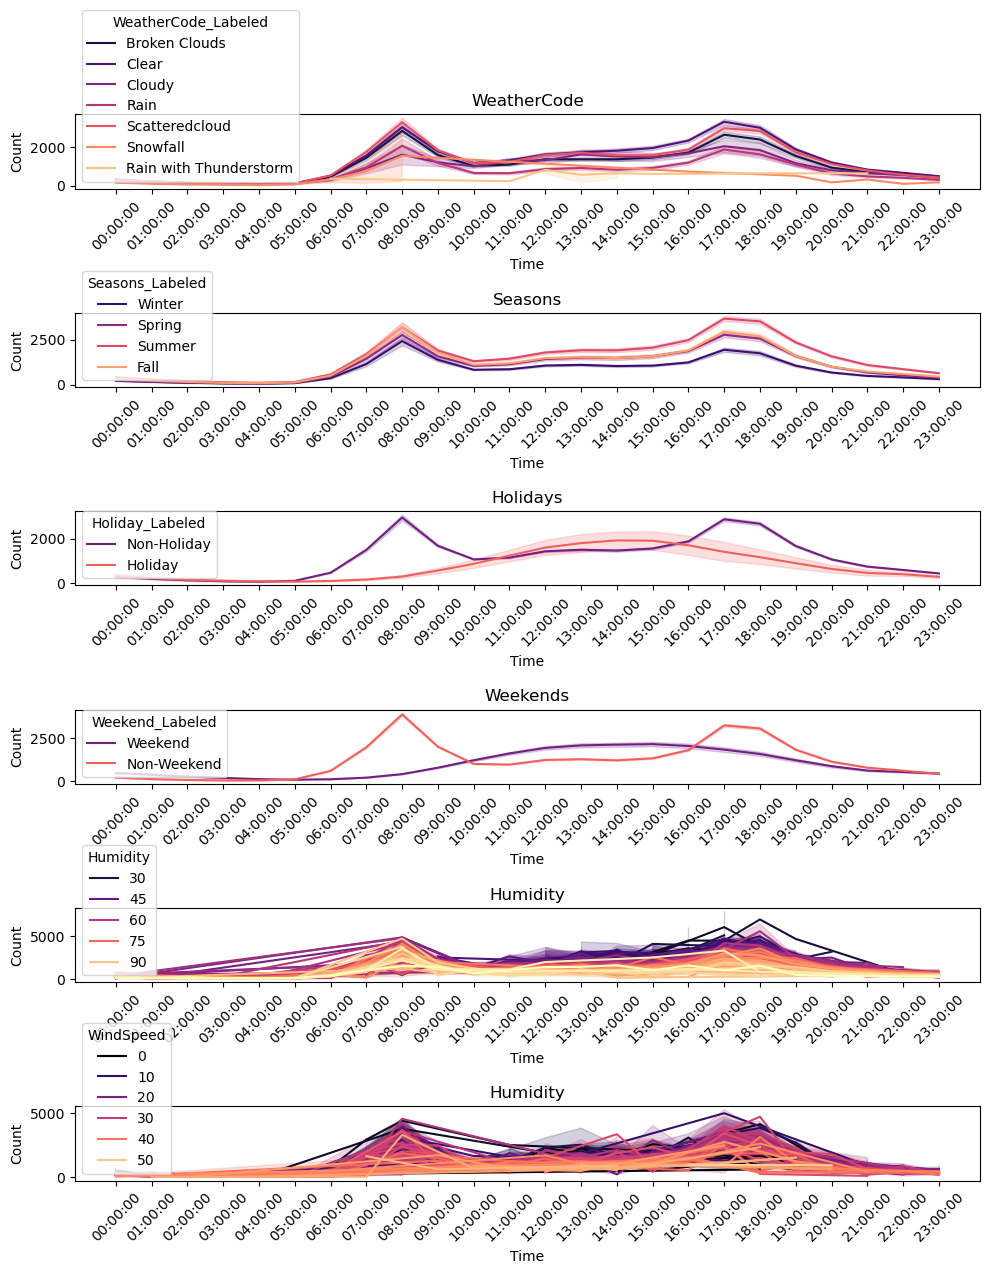

In [129]:
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

df['Time'] = df['Time'].astype(str)

plt.figure(figsize=(10, 12))

# WeatherCode
plt.subplot(6, 1, 1)
sns.lineplot(data= df, x='Time', y='Count', hue="WeatherCode_Labeled", palette="magma")
plt.title('WeatherCode')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Seasons
plt.subplot(6, 1, 2)
sns.lineplot(data=df, x='Time', y='Count', hue="Seasons_Labeled", palette="magma")
plt.title('Seasons')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Holiday
plt.subplot(6, 1, 3)
sns.lineplot(data=df, x='Time', y='Count', hue="Holiday_Labeled", palette="magma")
plt.title('Holidays')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Weekend
plt.subplot(6, 1, 4)
sns.lineplot(data=df, x='Time', y='Count', hue="Weekend_Labeled", palette="magma")
plt.title('Weekends')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Humidity
plt.subplot(6, 1, 5)
sns.lineplot(data=df, x='Time', y='Count', hue="Humidity", palette="magma")
plt.title('Humidity')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# WindSpeed
plt.subplot(6, 1, 6)
sns.lineplot(data=df, x='Time', y='Count', hue="WindSpeed", palette="magma")
plt.title('Humidity')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()